In [3]:
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
from pandas import DataFrame

import os

In [13]:
def separate_index(name: str) -> tuple[str, str]:
    parts = name.split("-")
    index = parts[-1]
    return "-".join(parts[:-1]), index

def plot_df(df: DataFrame, name, xkey, ykey):
    
    x = df[xkey]
    y = df[ykey]
    
    fig, ax = plt.subplots()
    
    ax.set_title(name)
    ax.set_xlabel(xkey)
    ax.set_ylabel(ykey)
    
    ax.plot(x, y)
    
def get_unique_runs(path: str) -> list[str]:
    files = os.listdir(path)
    
    names = list(set([separate_index(fn)[1] for fn in files]))
    sorted(names)
    
    return names

def get_runs(path: str, name: str) -> list[str]:
    files = os.listdir(path)
    
    fns = [fn for fn in files if separate_index(fn)[0] == name]
    
    return fns
    
def add_df(a: DataFrame, b: DataFrame) -> DataFrame:
    c = a.to_numpy() + b.to_numpy()
    return DataFrame(c, columns=a.columns)

def div_scalar_df(a: DataFrame, value: float) -> DataFrame:
    b = a.to_numpy()
    b /= value 
    return DataFrame(b, columns=a.columns)

def aggregate(path: str, name:str) -> DataFrame:
    df = DataFrame()
    
    runs = get_runs(path, name)
    
    for fn in runs:
        run = pd.read_csv(f"{path}/{fn}")
        df = add_df(df, run)
        
    df = div_scalar_df(df, len(runs))
    df = df.drop("time")
    
    df["time"] = run["time"]
    
    return df
        
        
def break_out_name(name:str) -> dict:
    parts = name.split("-")[0].split("_")
    
    return {
        "#Layer": parts[0],
        "Width": parts[1],
    }
    

In [5]:
a = DataFrame({
    "A": [1,2,3,4],
    "B": [11,12,13,14],
})
b = DataFrame({
    "A": [3,3,3,3],
    "B": [1,1,1,1],
})
c = add_df(a, b)
print(c)


   A   B
0  4  12
1  5  13
2  6  14
3  7  15


1_3_19999-results.csv
1_5_19999-results.csv
1_7_19999-results.csv
2_3_19999-results.csv
2_5_19999-results.csv
2_7_19999-results.csv
3_3_19999-results.csv
3_5_19999-results.csv
3_7_19999-results.csv
raw


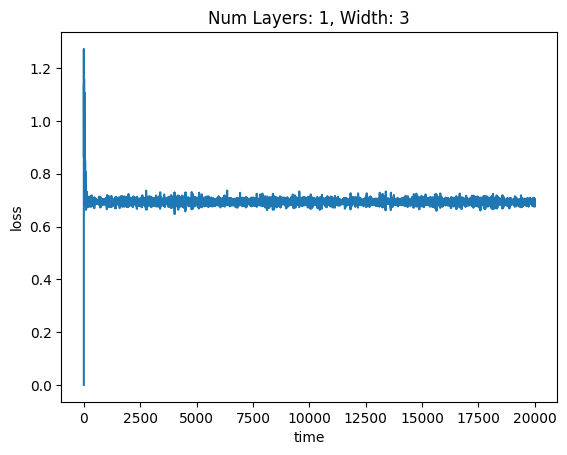

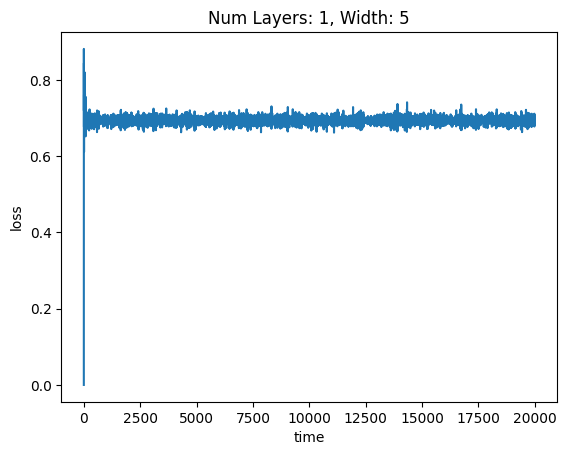

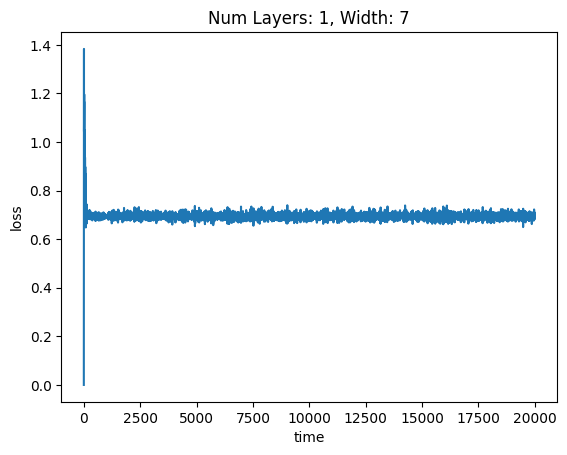

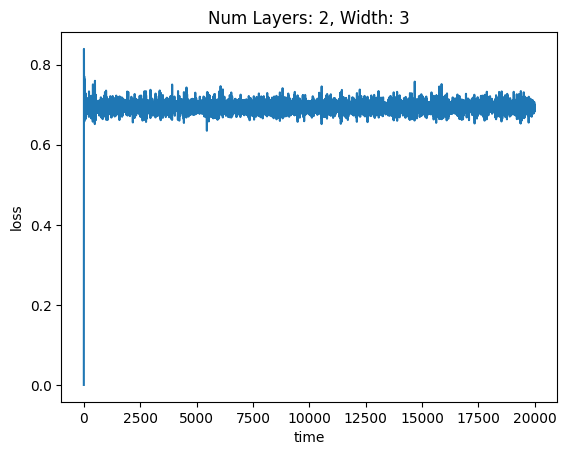

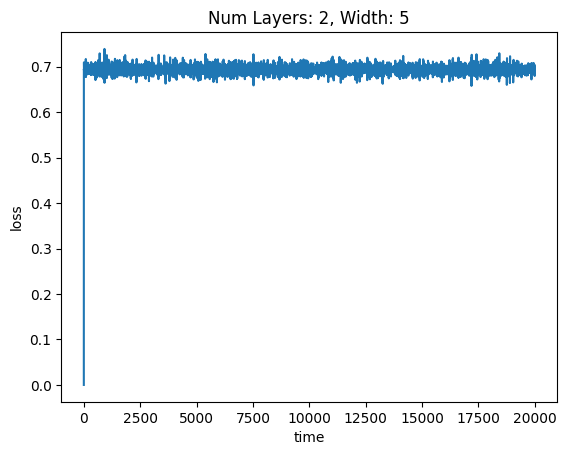

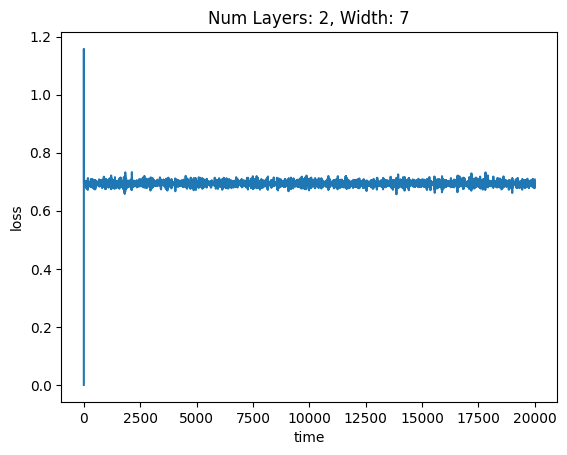

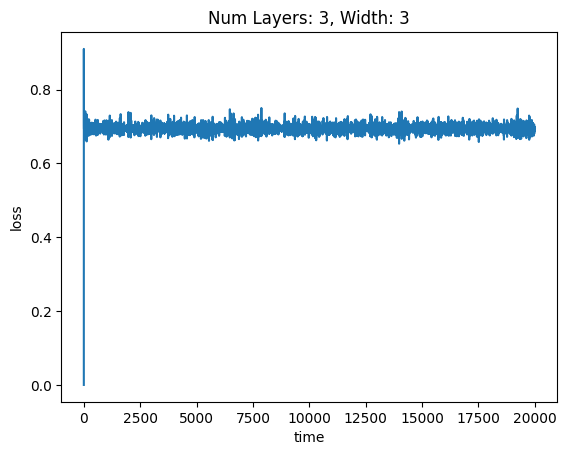

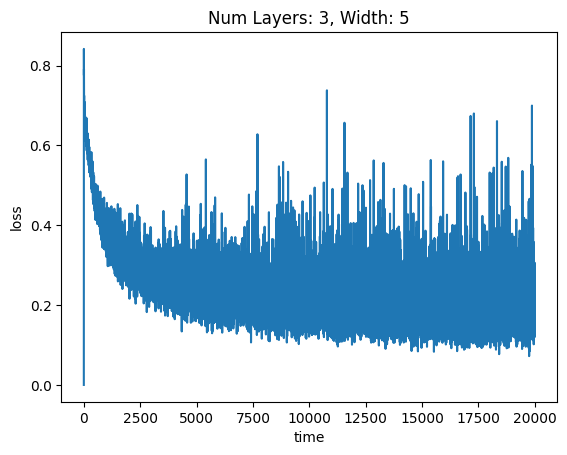

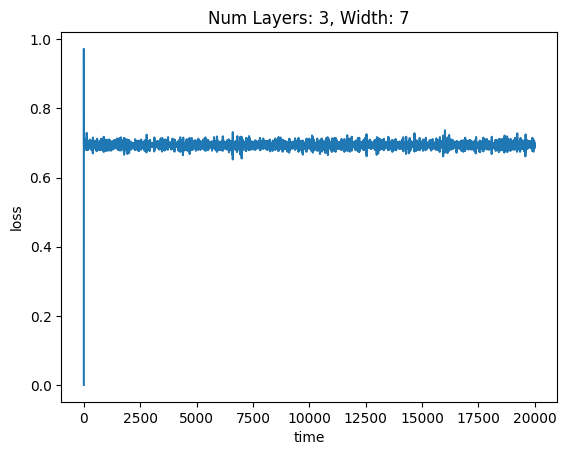

In [17]:
path = "results/archive"
for fn in os.listdir(path):
    print(fn)
    if os.path.isfile(f"{path}/{fn}"):
        exp =  break_out_name(fn)
        title = f"Num Layers: {exp['#Layer']}, Width: {exp['Width']}"
        df = pd.read_csv(f"{path}/{fn}")
        plot_df(df, title, "time", "loss")

1_3_19999-results.csv
1_5_19999-results.csv
1_7_19999-results.csv
2_3_19999-results.csv
2_5_19999-results.csv
2_7_19999-results.csv
3_3_19999-results.csv
3_5_19999-results.csv
3_7_19999-results.csv
raw


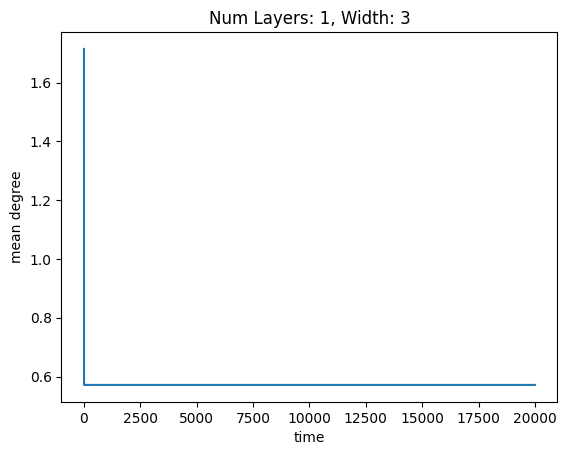

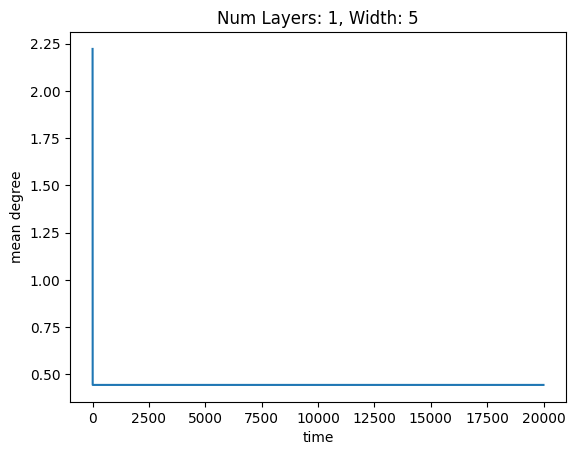

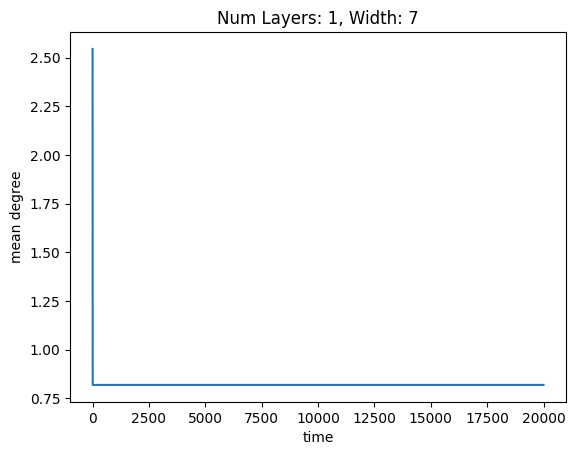

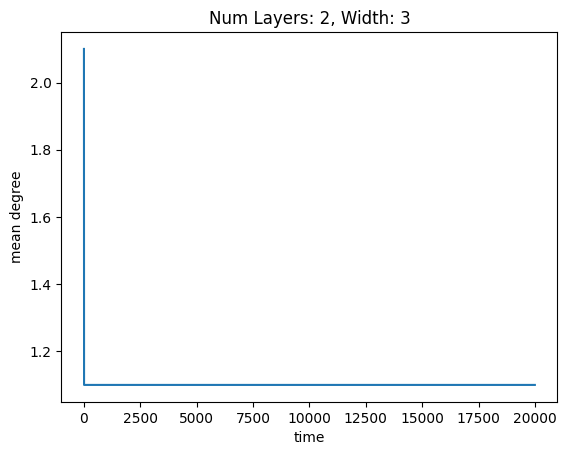

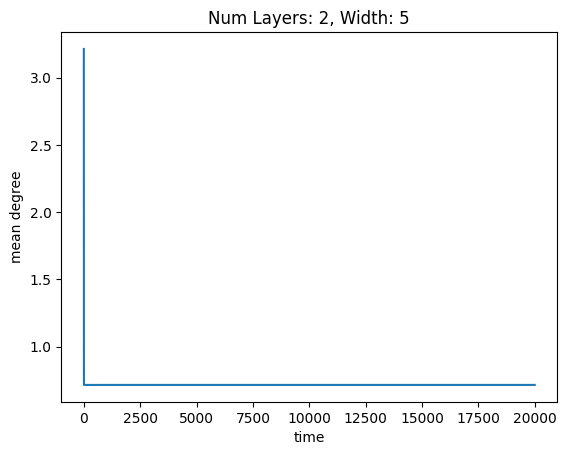

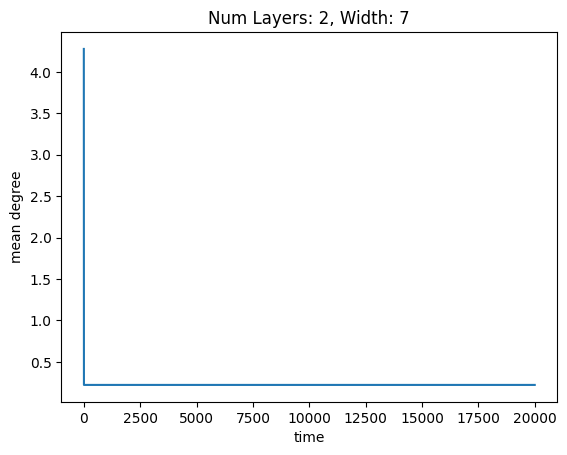

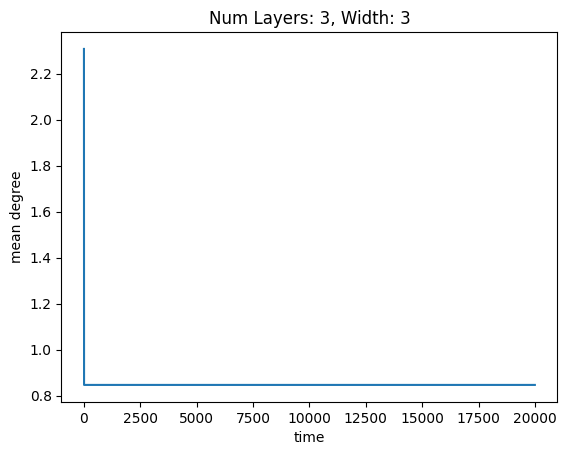

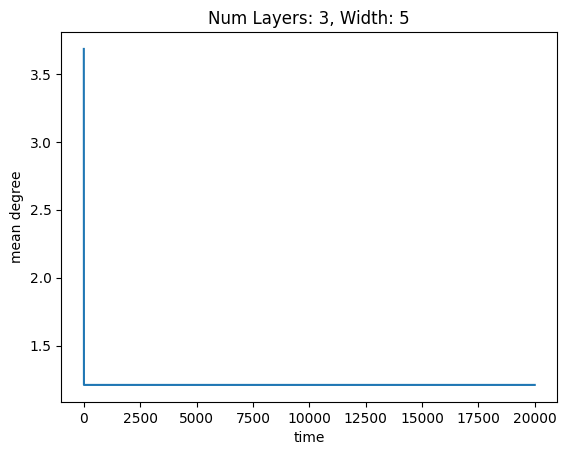

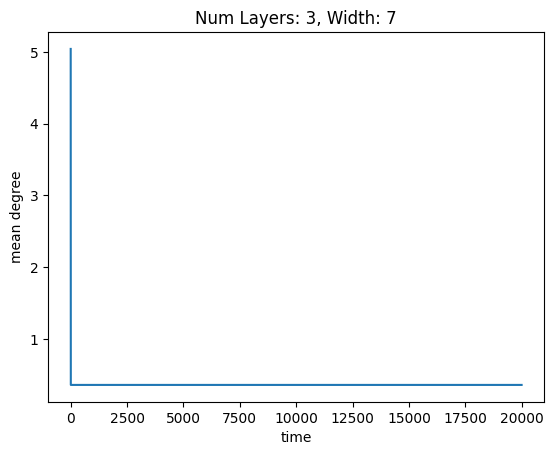

In [32]:
path = "results/archive"
for fn in os.listdir(path):
    print(fn)
    if os.path.isfile(f"{path}/{fn}"):
        exp =  break_out_name(fn)
        title = f"Num Layers: {exp['#Layer']}, Width: {exp['Width']}"
        df = pd.read_csv(f"{path}/{fn}")
        df['mean degree'] = df[[f"n{i}" for i in range(1, len(df.columns)- 1)]].mean(axis=1)
        plot_df(df, title, "time", 'mean degree')
        